In [23]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print("Lib imported")

Lib imported


In [24]:
mainData = pd.read_csv("training.csv")
print("Data imported")
mainData

Data imported


,Time,Velocity,GForce,Acceleration,TWR,Mass,AltitudeFromTerrain,DownrangeDistance,Apoapsis,Inclination,OrbitalVelocity,VesselDeltaV,Pressure,Classifier
0,1,24,5.09,40.20,5.13,58.34,102.11,0.00,120,0.10,177,1992,99.97,1
1,2,64,5.25,41.74,5.29,56.94,145.38,0.00,345,0.10,186,1939,99.34,1
2,3,107,5.34,42.71,5.44,55.48,232.97,0.00,812,0.10,209,1886,98.06,1
3,4,148,5.47,44.76,5.58,54.07,357.53,0.02,1458,0.11,245,1844,96.26,1
4,5,191,5.64,47.65,5.76,52.61,526.67,0.05,2281,0.13,291,1790,93.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,424,1613,1.40,10.60,0.00,22.30,4633.32,446.16,84988,0.38,1759,0,48.37,3
3220,425,1603,1.58,11.94,0.00,22.30,3658.62,447.51,82432,0.38,1749,0,56.96,3
3221,426,1593,1.75,13.32,0.00,22.30,2762.38,448.75,79852,0.38,1738,0,65.92,3
3222,427,1580,1.95,14.99,0.00,22.30,1814.85,450.05,76881,0.38,1725,0,76.59,3


In [25]:
mainData = mainData.drop(["Unnamed: 13"],axis=1)

KeyError: "['Unnamed: 13'] not found in axis"

In [26]:
mainData

,Time,Velocity,GForce,Acceleration,TWR,Mass,AltitudeFromTerrain,DownrangeDistance,Apoapsis,Inclination,OrbitalVelocity,VesselDeltaV,Pressure,Classifier
0,1,24,5.09,40.20,5.13,58.34,102.11,0.00,120,0.10,177,1992,99.97,1
1,2,64,5.25,41.74,5.29,56.94,145.38,0.00,345,0.10,186,1939,99.34,1
2,3,107,5.34,42.71,5.44,55.48,232.97,0.00,812,0.10,209,1886,98.06,1
3,4,148,5.47,44.76,5.58,54.07,357.53,0.02,1458,0.11,245,1844,96.26,1
4,5,191,5.64,47.65,5.76,52.61,526.67,0.05,2281,0.13,291,1790,93.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,424,1613,1.40,10.60,0.00,22.30,4633.32,446.16,84988,0.38,1759,0,48.37,3
3220,425,1603,1.58,11.94,0.00,22.30,3658.62,447.51,82432,0.38,1749,0,56.96,3
3221,426,1593,1.75,13.32,0.00,22.30,2762.38,448.75,79852,0.38,1738,0,65.92,3
3222,427,1580,1.95,14.99,0.00,22.30,1814.85,450.05,76881,0.38,1725,0,76.59,3


In [27]:
mainData.describe()

,Time,Velocity,GForce,Acceleration,TWR,Mass,AltitudeFromTerrain,DownrangeDistance,Apoapsis,Inclination,OrbitalVelocity,VesselDeltaV,Pressure,Classifier
count,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000
mean,279.980459,1113.804280,0.420081,9.888691,0.411380,23.178505,125535.781030,165.658688,182826.895161,41.315608,1175.432072,57.898573,3.628201,1.971464
std,171.724227,396.497424,1.825242,15.107480,1.923214,4.556876,75274.296682,128.483574,71088.968607,57.545488,406.183412,285.722717,15.250715,0.453680
min,1.000000,24.000000,0.000000,0.590000,0.000000,22.300000,102.070000,0.000000,120.000000,0.100000,117.000000,0.000000,0.000000,1.000000
25%,135.000000,843.000000,0.000000,5.770000,0.000000,22.300000,67065.140000,41.320000,101512.000000,0.360000,973.000000,0.000000,0.000000,2.000000
50%,269.000000,1156.000000,0.000000,6.790000,0.000000,22.300000,118501.805000,153.900000,197335.000000,0.380000,1198.000000,0.000000,0.000000,2.000000
75%,411.000000,1408.250000,0.000000,7.802500,0.000000,22.300000,181864.910000,271.162500,205778.000000,80.480000,1466.000000,0.000000,0.000000,2.000000
max,684.000000,1868.000000,14.460000,133.200000,14.810000,58.340000,283624.180000,455.810000,285387.000000,179.550000,1940.000000,1992.000000,99.970000,3.000000


In [28]:
dataX = mainData[["Acceleration","TWR","AltitudeFromTerrain","DownrangeDistance","Inclination","VesselDeltaV","Apoapsis","Pressure","GForce"]]
dataX.head()

,Acceleration,TWR,AltitudeFromTerrain,DownrangeDistance,Inclination,VesselDeltaV,Apoapsis,Pressure,GForce
0,40.20,5.13,102.11,0.00,0.10,1992,120,99.97,5.09
1,41.74,5.29,145.38,0.00,0.10,1939,345,99.34,5.25
2,42.71,5.44,232.97,0.00,0.10,1886,812,98.06,5.34
3,44.76,5.58,357.53,0.02,0.11,1844,1458,96.26,5.47
4,47.65,5.76,526.67,0.05,0.13,1790,2281,93.85,5.64


In [29]:
dataY = mainData["Velocity"]
dataY.head()

0     24
1     64
2    107
3    148
4    191
Name: Velocity, dtype: int64

In [30]:
xTrain,xTest,yTrain,yTest = train_test_split(dataX,dataY,random_state=104 ,test_size=0.3,shuffle=True)

In [31]:
xTrain.describe()

,Acceleration,TWR,AltitudeFromTerrain,DownrangeDistance,Inclination,VesselDeltaV,Apoapsis,Pressure,GForce
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,9.776844,0.397903,125299.122722,165.768679,41.148825,57.778812,182442.076684,3.669136,0.409730
std,14.714611,1.876249,75417.999719,128.606831,57.157433,285.591525,71240.181529,15.312158,1.786377
min,0.590000,0.000000,102.070000,0.000000,0.100000,0.000000,120.000000,0.000000,0.000000
25%,5.770000,0.000000,67352.145000,41.752500,0.360000,0.000000,101512.000000,0.000000,0.000000
50%,6.820000,0.000000,117011.435000,152.955000,0.380000,0.000000,197335.000000,0.000000,0.000000
75%,7.800000,0.000000,181996.137500,269.767500,80.480000,0.000000,205778.000000,0.000000,0.000000
max,133.200000,14.810000,283622.620000,455.810000,179.550000,1992.000000,284898.000000,99.970000,14.460000


In [32]:
mainData

,Time,Velocity,GForce,Acceleration,TWR,Mass,AltitudeFromTerrain,DownrangeDistance,Apoapsis,Inclination,OrbitalVelocity,VesselDeltaV,Pressure,Classifier
0,1,24,5.09,40.20,5.13,58.34,102.11,0.00,120,0.10,177,1992,99.97,1
1,2,64,5.25,41.74,5.29,56.94,145.38,0.00,345,0.10,186,1939,99.34,1
2,3,107,5.34,42.71,5.44,55.48,232.97,0.00,812,0.10,209,1886,98.06,1
3,4,148,5.47,44.76,5.58,54.07,357.53,0.02,1458,0.11,245,1844,96.26,1
4,5,191,5.64,47.65,5.76,52.61,526.67,0.05,2281,0.13,291,1790,93.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,424,1613,1.40,10.60,0.00,22.30,4633.32,446.16,84988,0.38,1759,0,48.37,3
3220,425,1603,1.58,11.94,0.00,22.30,3658.62,447.51,82432,0.38,1749,0,56.96,3
3221,426,1593,1.75,13.32,0.00,22.30,2762.38,448.75,79852,0.38,1738,0,65.92,3
3222,427,1580,1.95,14.99,0.00,22.30,1814.85,450.05,76881,0.38,1725,0,76.59,3


Text(0.5, 0, 'Velocity')

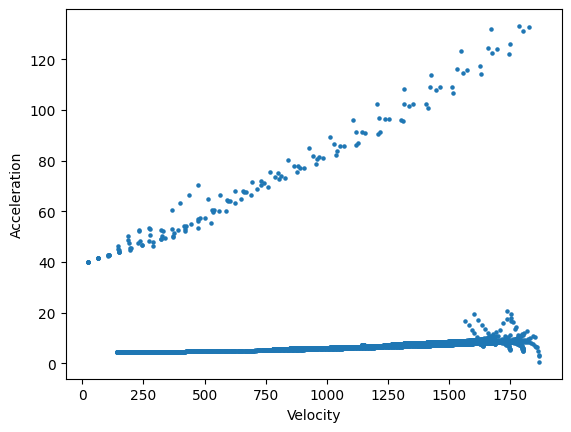

In [33]:
plt.scatter(y=mainData["Acceleration"],x=mainData["Velocity"], s = 5)
plt.ylabel("Acceleration")
plt.xlabel("Velocity")

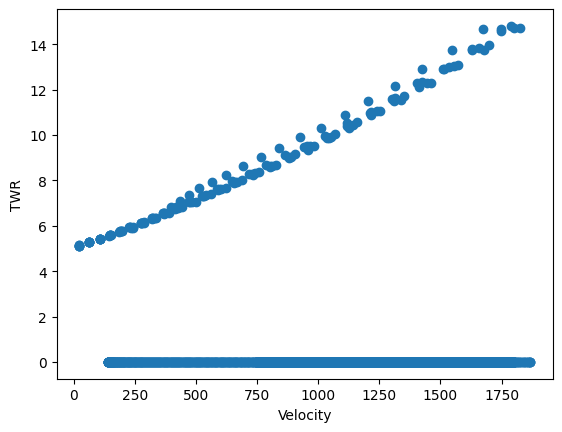

In [34]:
plt.scatter(y=mainData["TWR"],x=mainData["Velocity"])
plt.ylabel("TWR")
plt.xlabel("Velocity")
plt.show()

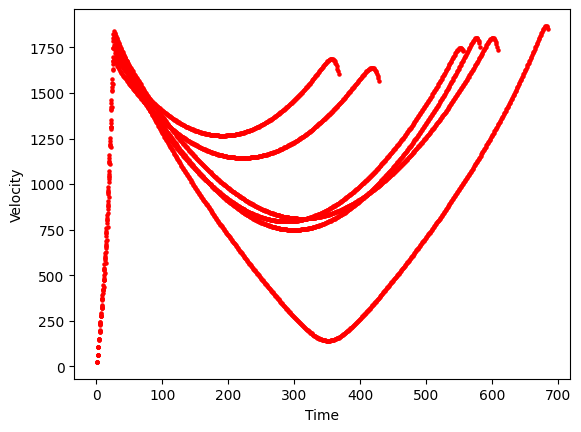

In [35]:
plt.scatter(x=mainData["Time"],y=mainData["Velocity"],s=5,c='r')
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.show()

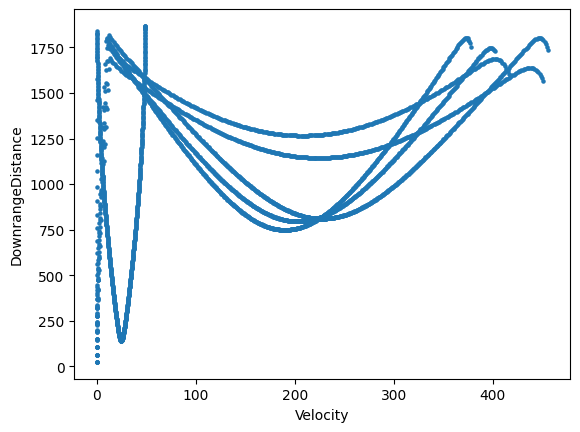

In [36]:
plt.scatter(x=mainData["DownrangeDistance"],y=mainData["Velocity"],s=5)
plt.ylabel("DownrangeDistance")
plt.xlabel("Velocity")
plt.show()

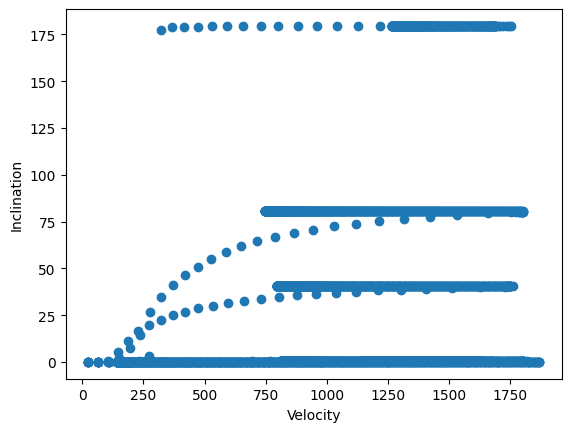

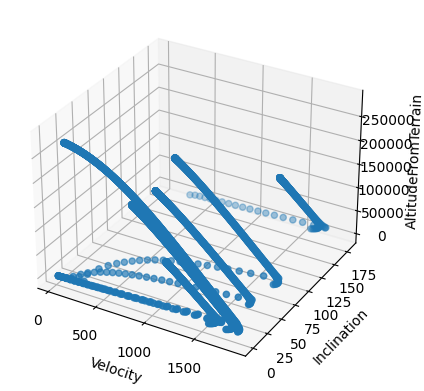

<Figure size 200x200 with 0 Axes>

In [37]:
plt.scatter(y=mainData["Inclination"],x=mainData["Velocity"])
plt.xlabel("Velocity")
plt.ylabel("Inclination")

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(mainData["Velocity"],mainData["Inclination"] , mainData["AltitudeFromTerrain"])

ax.set_xlabel('Velocity')
ax.set_ylabel('Inclination')
ax.set_zlabel('AltitudeFromTerrain')
plt.figure(figsize=(2, 2))
plt.show()

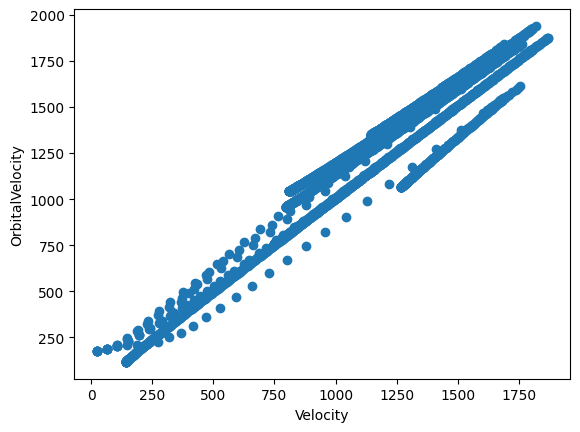

In [38]:
plt.scatter(y=mainData["OrbitalVelocity"],x=mainData["Velocity"])
plt.ylabel("OrbitalVelocity")
plt.xlabel("Velocity")
plt.show()

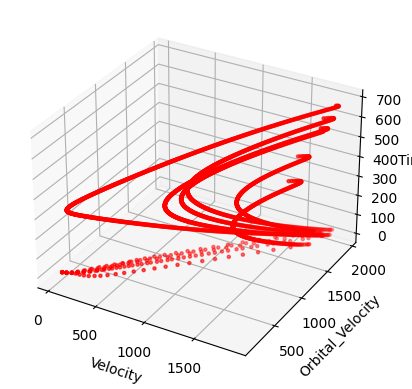

<Figure size 1200x1000 with 0 Axes>

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(mainData["Velocity"],mainData["OrbitalVelocity"] , mainData["Time"],s= 5, c= 'r')
ax.set_xlabel('Velocity')
ax.set_ylabel('Orbital_Velocity')
ax.set_zlabel('Time')
ax = plt.figure(figsize=(12,10))
plt.show()

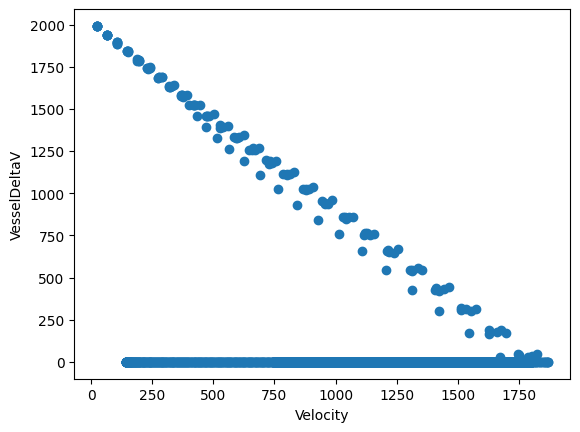

In [40]:
plt.scatter(y=mainData["VesselDeltaV"],x=mainData["Velocity"])
plt.ylabel("VesselDeltaV")
plt.xlabel("Velocity")
plt.show()

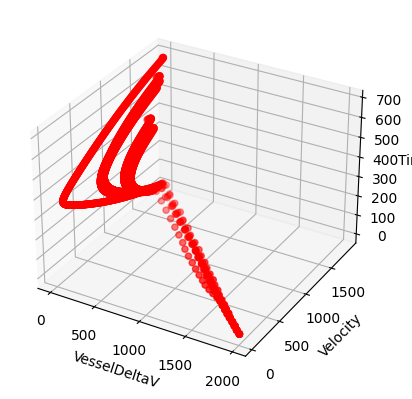

<Figure size 1200x1000 with 0 Axes>

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(mainData["VesselDeltaV"],mainData["Velocity"] , mainData["Time"], c= 'r')
ax.set_ylabel('Velocity')
ax.set_xlabel('VesselDeltaV')
ax.set_zlabel('Time')
ax = plt.figure(figsize=(12,10))
plt.show()


In [42]:
model = LinearRegression().fit(xTrain,yTrain)

In [43]:
predict = model.predict(xTest)
predict_frame = pd.DataFrame(predict)
predict_frame.head()

,0
0,1264.242526
1,1287.358794
2,1698.888061
3,360.151720
4,1355.680812


In [44]:
model.score(xTest,yTest)

0.983324412102675

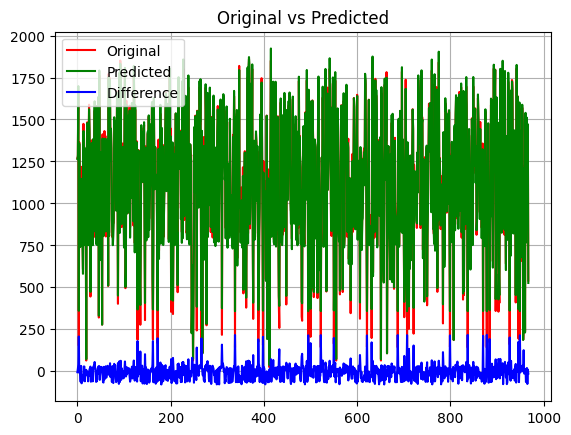

In [45]:
time = np.arange(0,968,1)
diff = predict - yTest
plt.plot(time, yTest, c='r', label = "Original")
plt.plot(time, predict, c = 'g', label = "Predicted")
plt.plot(time, diff, c = 'b', label = "Difference")
plt.title("Original vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

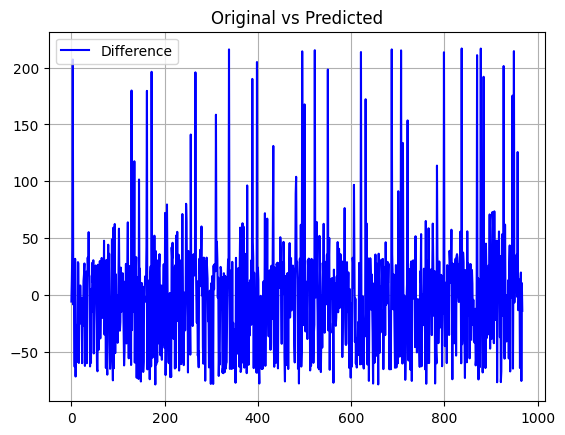

In [90]:
time = np.arange(0,968,1)
plt.plot(time, diff, c = 'b', label = "Difference")
plt.title("Original vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# Root Means Square Error

In [91]:
sum_diff = 0
for i in diff.head():
    if i < 0:
        i = i*i
        sum_diff += i

sum_diff = sum_diff /2*len(diff)
sum_diff = math.sqrt(sum_diff)
print(sum_diff)

222.57802946527275


In [83]:
yTest_sort = yTest.sort_values()
diff_sort = diff.sort_values()
diff_sort

186     -78.675213
172     -78.617396
179     -78.235496
183     -78.176748
171     -78.057393
           ...    
1331    215.305862
1329    216.013070
1320    216.023414
1325    216.749633
1322    216.833585
Name: Velocity, Length: 968, dtype: float64

In [47]:
predict_series = pd.Series(predict)
predict_series.head()

0    1264.242526
1    1287.358794
2    1698.888061
3     360.151720
4    1355.680812
dtype: float64

In [48]:
predict_series_sort = predict_series.sort_values()
predict_series_sort.describe()

count     968.000000
mean     1111.878245
std       391.608171
min        35.954867
25%       829.502216
50%      1150.355766
75%      1399.140325
max      1922.935920
dtype: float64

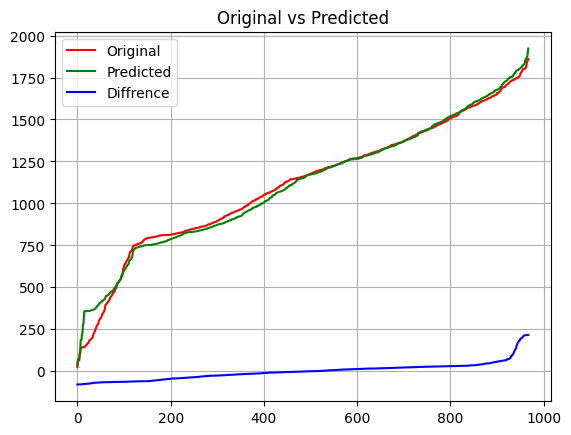

In [53]:
time = np.arange(0,968,1)
plt.plot(time, yTest_sort, c='r', label = "Original")
plt.plot(time, predict_series_sort, c = 'g', label = "Predicted")
plt.plot(time, diff_sort, c = 'b', label = "Diffrence")
plt.title("Original vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

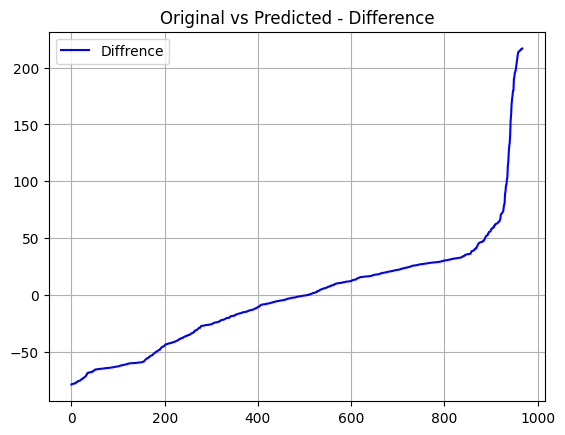

In [54]:
time = np.arange(0,968,1)
plt.plot(time, diff_sort, c = 'b', label = "Diffrence")
plt.title("Original vs Predicted - Difference")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
model.coef_

array([-9.96599531e-01,  1.62083678e+01, -5.91949723e-03,  8.32354061e-02,
        3.03727992e-01, -6.88209521e-01,  1.54642332e-03, -2.10579737e+00,
       -5.37470549e+00])

In [51]:
model.intercept_

1600.5062975041255

In [52]:
valid = pd.read_csv("6.csv")

FileNotFoundError: [Errno 2] No such file or directory: '6.csv'

In [116]:
validX = valid[["Acceleration","TWR","AltitudeFromTerrain","DownrangeDistance","Inclination","VesselDeltaV","Apoapsis","Pressure","GForce"]]
validX

,Acceleration,TWR,AltitudeFromTerrain,DownrangeDistance,Inclination,VesselDeltaV,Apoapsis,Pressure,GForce
0,40.20,5.13,102.13,0.00,0.10,1991,120,99.97,5.09
1,41.78,5.28,145.40,0.00,0.10,1940,345,99.34,5.25
2,42.97,5.43,233.26,0.00,0.10,1889,816,98.06,5.38
3,44.05,5.59,359.94,0.00,0.10,1838,1511,96.24,5.49
4,45.44,5.77,537.05,0.01,0.10,1787,2510,93.73,5.63
...,...,...,...,...,...,...,...,...,...
423,10.60,0.00,4633.32,446.16,0.38,0,84988,48.37,1.40
424,11.94,0.00,3658.62,447.51,0.38,0,82432,56.96,1.58
425,13.32,0.00,2762.38,448.75,0.38,0,79852,65.92,1.75
426,14.99,0.00,1814.85,450.05,0.38,0,76881,76.59,1.95


In [117]:
validY = valid[["Velocity"]]
validY

,Velocity
0,24
1,64
2,108
3,150
4,196
...,...
423,1613
424,1603
425,1593
426,1580


In [118]:
model.score(validX,validY)

0.988893084637183

accuracy = 98.8893084637183 %

In [119]:
predictValid = model.predict(validX)

In [120]:
validY = validY.iloc[:, 0].tolist()
type(validY)

list

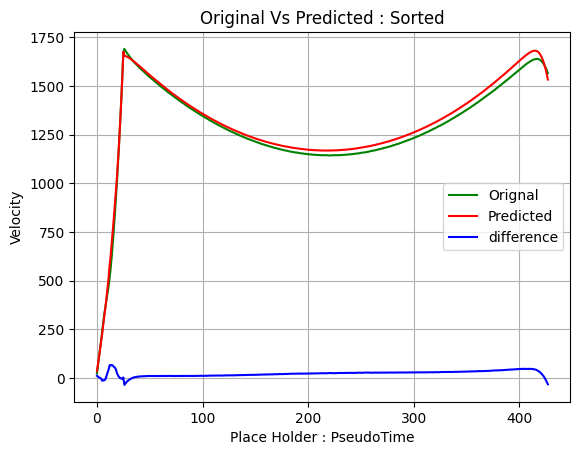

In [122]:
time = np.arange(0,428,1)
diffValid = predictValid - validY
plt.plot(time, validY, c='g', label = "Orignal")
plt.plot(time, predictValid, c='r', label = "Predicted")
plt.plot(time, diffValid, c='b', label = "difference")
plt.legend()
plt.title(label="Original Vs Predicted : Sorted")
plt.ylabel("Velocity")
plt.xlabel("Place Holder : PseudoTime")
plt.grid(True)
plt.grid(True)
plt.show()

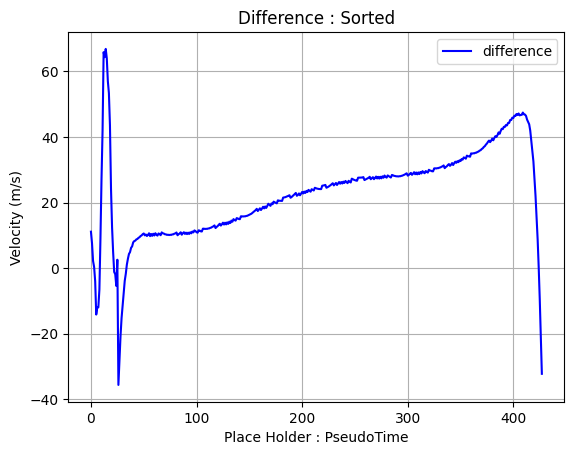

In [123]:
time = np.arange(0, 428, 1)
diffValid = predictValid - validY
plt.plot(time, diffValid, c='b', label="difference")
plt.legend()
plt.title(label="Difference : Sorted")
plt.ylabel("Velocity (m/s)")
plt.xlabel("Place Holder : PseudoTime")
plt.grid(True)
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

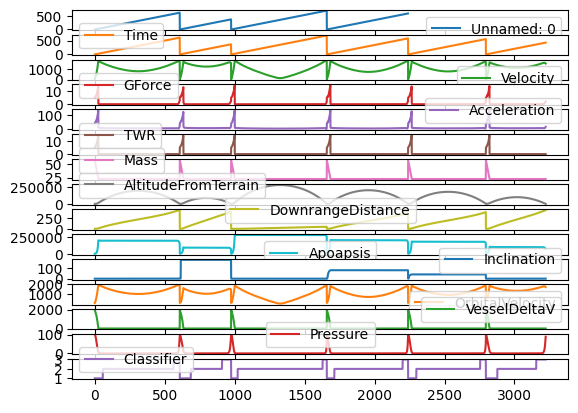

In [124]:
mainData.plot(kind = "line",subplots= True)